In [ ]:
                                                                                                                                                                                                                                                                                                !pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 22.9 MB/s eta 0:00:00


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="C1cebd9Z7fPLlDfJTiH7")
project = rf.workspace("aadi-5hpnv").project("plant-diseases-fbvex")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Plant-Diseases-2 in yolov8:: 100%|██████████| 5124/5124 [00:02<00:00, 2163.61it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


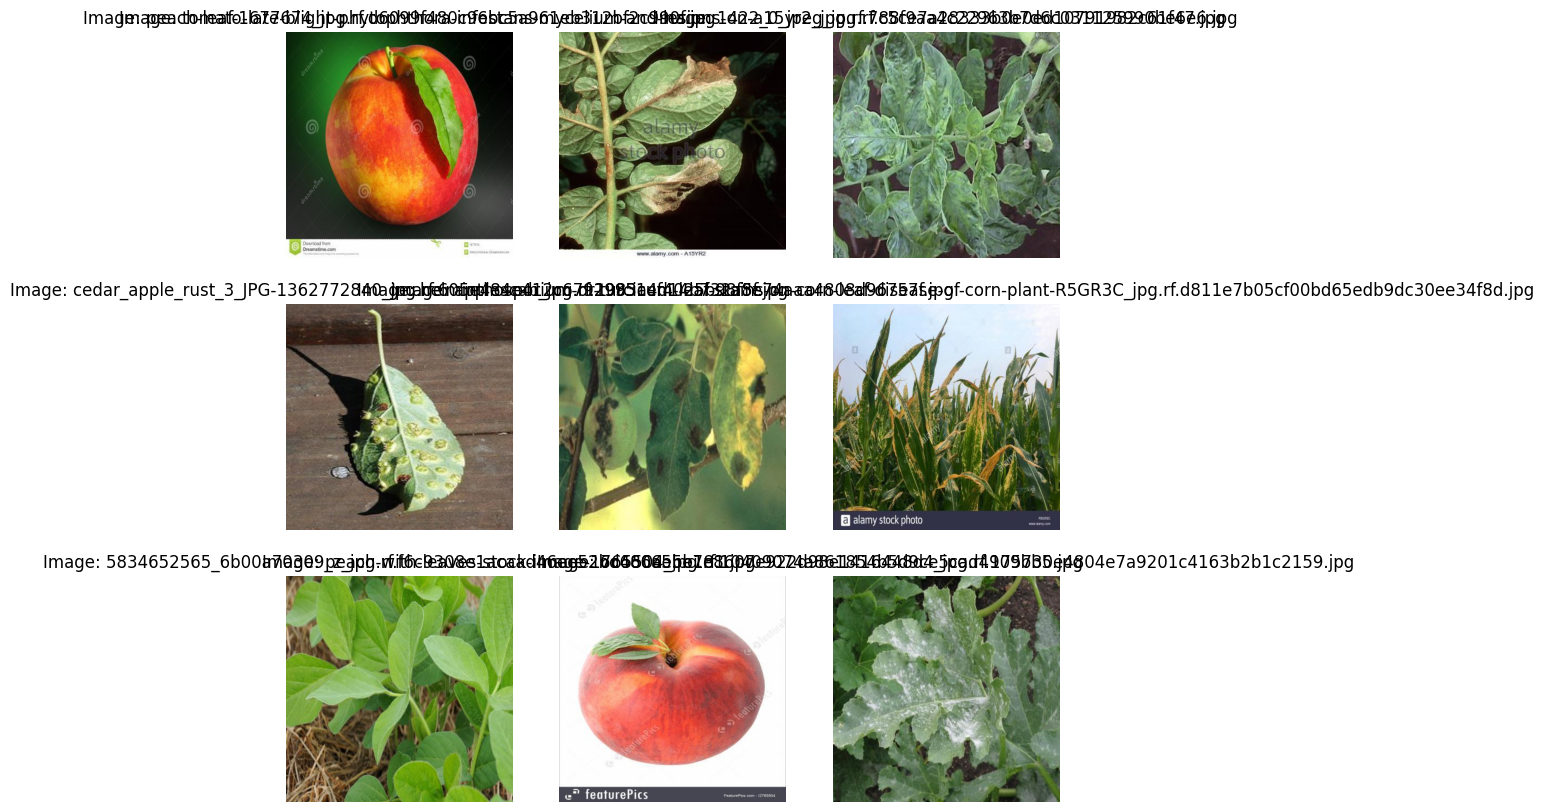

In [ ]:
import os
from PIL import Image #Python image library
import matplotlib.pyplot as plt

# Path to your dataset (adjust as necessary)
dataset_path = "/content/Plant-Diseases-2/train/images"

# 1. Inspect Dataset Structure
image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.png', '.jpg', '.jpeg'))]


# 4. Visualize a Few Sample Images

plt.figure(figsize=(10, 10))
for i, image_file in enumerate(image_files[:9]):  # Show first 9 images
    img_path = os.path.join(dataset_path, image_file)
    img = Image.open(img_path)

    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(f"Image: {image_file}")
    plt.axis('off')


plt.show()

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")  # You can change the model to yolov8s.pt, yolov8m.pt, etc., based on your needs

# Train the model
Model = model.train(
    data=f"{dataset.location}/data.yaml",  # Path to the dataset YAML file
    epochs=25,                             # Number of epochs for training
    imgsz=640,                              # Image size
    batch=16,                               # Batch size
    name="yolov8_plant_disease_detection"   # Name of the run

)

# Evaluate the model on the validation set
metrics = model.val()

# Save the model after training
model.save("best_model.pt")



Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Plant-Diseases-2/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_plant_disease_detection3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

train: Scanning /content/Plant-Diseases-2/train/labels.cache... 1786 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1786/1786 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Plant-Diseases-2/valid/labels.cache... 513 images, 0 backgrounds, 0 corrupt: 100%|██████████| 513/513 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8_plant_disease_detection3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000294, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8_plant_disease_detection3
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.51G      1.314      4.408       1.55        119        640: 100%|██████████| 112/112 [00:38<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.53it/s]

                   all        513       1897     0.0386      0.136     0.0359     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.54G       1.22      4.061      1.444         46        640: 100%|██████████| 112/112 [00:35<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.38it/s]

                   all        513       1897      0.214      0.096     0.0567      0.037



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.53G       1.26       3.72      1.467         39        640: 100%|██████████| 112/112 [00:43<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.96it/s]


                   all        513       1897      0.218      0.142     0.0995     0.0667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.42G      1.315      3.418      1.499         49        640: 100%|██████████| 112/112 [00:37<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.65it/s]

                   all        513       1897      0.156      0.221      0.111     0.0721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.51G      1.303      3.219      1.484         66        640: 100%|██████████| 112/112 [00:36<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.42it/s]

                   all        513       1897      0.161       0.22       0.15     0.0995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.51G      1.269      3.051      1.474         76        640: 100%|██████████| 112/112 [00:35<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.21it/s]


                   all        513       1897      0.143      0.264      0.158      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.44G      1.279      2.969      1.468         57        640: 100%|██████████| 112/112 [00:35<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.23it/s]


                   all        513       1897      0.169      0.297      0.172      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.43G       1.26      2.842       1.45         46        640: 100%|██████████| 112/112 [00:36<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.26it/s]


                   all        513       1897       0.22      0.293       0.23      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.55G      1.216      2.752      1.423         45        640: 100%|██████████| 112/112 [00:43<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.82it/s]

                   all        513       1897      0.223      0.292      0.227      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.41G      1.249      2.707       1.44         87        640: 100%|██████████| 112/112 [00:36<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.29it/s]

                   all        513       1897      0.209      0.332      0.233      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.51G       1.22      2.623      1.413         64        640: 100%|██████████| 112/112 [00:35<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.37it/s]

                   all        513       1897      0.254      0.348      0.271      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.57G      1.217      2.529      1.404         55        640: 100%|██████████| 112/112 [00:35<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.20it/s]


                   all        513       1897      0.251       0.35      0.263      0.178

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.54G      1.218      2.508      1.413         43        640: 100%|██████████| 112/112 [00:35<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.20it/s]


                   all        513       1897      0.321      0.343      0.288      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.45G      1.188      2.439      1.386         38        640: 100%|██████████| 112/112 [00:34<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.41it/s]


                   all        513       1897      0.335      0.357      0.316       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25       2.5G      1.208      2.408       1.39         80        640: 100%|██████████| 112/112 [00:44<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.58it/s]

                   all        513       1897      0.297      0.388      0.312      0.217


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.43G      1.154      2.526      1.393         56        640: 100%|██████████| 112/112 [00:38<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.94it/s]

                   all        513       1897      0.324      0.397      0.331      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.42G      1.127      2.418      1.363         31        640: 100%|██████████| 112/112 [00:36<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.46it/s]

                   all        513       1897      0.354      0.381      0.344      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.41G      1.122      2.324      1.359         29        640: 100%|██████████| 112/112 [00:33<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.36it/s]


                   all        513       1897      0.348      0.398      0.352      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.44G      1.104      2.289      1.359         37        640: 100%|██████████| 112/112 [00:33<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.84it/s]


                   all        513       1897      0.357      0.397      0.362      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.41G      1.105      2.252      1.349         36        640: 100%|██████████| 112/112 [00:35<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.45it/s]


                   all        513       1897      0.376      0.417      0.368      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.44G      1.099      2.224      1.341         23        640: 100%|██████████| 112/112 [00:35<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.95it/s]

                   all        513       1897      0.364      0.418      0.371       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.41G      1.072      2.169      1.326         30        640: 100%|██████████| 112/112 [00:41<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.96it/s]

                   all        513       1897      0.359      0.414      0.369      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.41G      1.085      2.155      1.324         54        640: 100%|██████████| 112/112 [00:38<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.93it/s]

                   all        513       1897      0.333      0.434      0.367      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.41G      1.071      2.117      1.317         21        640: 100%|██████████| 112/112 [00:36<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.00it/s]

                   all        513       1897      0.379      0.428      0.381      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.39G      1.052      2.064      1.308         38        640: 100%|██████████| 112/112 [00:34<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.17it/s]


                   all        513       1897       0.38      0.422      0.381      0.271

25 epochs completed in 0.316 hours.
Optimizer stripped from runs/detect/yolov8_plant_disease_detection3/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/yolov8_plant_disease_detection3/weights/best.pt, 5.6MB

Validating runs/detect/yolov8_plant_disease_detection3/weights/best.pt...
Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,690,218 parameters, 0 gradients, 6.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]


                   all        513       1897       0.38       0.43      0.381      0.271
       Apple Scab Leaf         19         27      0.487      0.407       0.39      0.308
            Apple leaf         17         51      0.438      0.627      0.533      0.397
       Apple rust leaf         17         29      0.357      0.363      0.295      0.186
      Bell_pepper leaf         15         64      0.259     0.0938     0.0906     0.0685
 Bell_pepper leaf spot          7         63      0.319      0.206      0.229      0.157
        Blueberry leaf         28        190      0.486        0.6      0.531      0.341
           Cherry leaf         13         47      0.359      0.319       0.27      0.206
   Corn Gray leaf spot         11         13      0.186      0.352      0.238       0.19
      Corn leaf blight         37         90      0.571      0.689      0.638        0.4
        Corn rust leaf         20         22      0.698      0.636      0.759      0.575
            Peach lea

val: Scanning /content/Plant-Diseases-2/valid/labels.cache... 513 images, 0 backgrounds, 0 corrupt: 100%|██████████| 513/513 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.31it/s]


                   all        513       1897      0.379      0.428      0.381      0.271
       Apple Scab Leaf         19         27      0.487      0.407      0.389      0.307
            Apple leaf         17         51      0.432      0.611      0.534      0.396
       Apple rust leaf         17         29      0.348       0.35      0.295      0.187
      Bell_pepper leaf         15         64      0.258     0.0938     0.0939     0.0714
 Bell_pepper leaf spot          7         63      0.321      0.206      0.229      0.157
        Blueberry leaf         28        190      0.488        0.6      0.531      0.342
           Cherry leaf         13         47       0.36      0.319      0.271      0.203
   Corn Gray leaf spot         11         13      0.163      0.308      0.237      0.189
      Corn leaf blight         37         90       0.57      0.689      0.637      0.398
        Corn rust leaf         20         22      0.698      0.636      0.758      0.578
            Peach lea

In [ ]:
# Inference on new images
results = model.predict(source="/content/Plant-Diseases-2/test/images", save=True)

# Display results


image 1/257 /content/Plant-Diseases-2/test/images/00009_jpg.rf.c80a10c68ee3657f9f2c765a20e34bf1.jpg: 640x640 1 Potato leaf, 1 Tomato leaf mosaic virus, 9.4ms
image 2/257 /content/Plant-Diseases-2/test/images/00gb_jpg.rf.b042dab12dbd98469b5dd34e055da97c.jpg: 640x640 3 Squash Powdery mildew leafs, 6 grape leafs, 1 grape leaf black rot, 13.1ms
image 3/257 /content/Plant-Diseases-2/test/images/011_jpg.rf.209cf2fb15873512d8bc21208facf125.jpg: 640x640 2 Corn leaf blights, 13.7ms
image 4/257 /content/Plant-Diseases-2/test/images/0796_40comrust_jpg.rf.cc95f58c741e4b1acd2e1529ffa852fc.jpg: 640x640 1 Corn rust leaf, 9.5ms
image 5/257 /content/Plant-Diseases-2/test/images/0_jpg.rf.fa576bdd9f6bc727353514d08b202c56.jpg: 640x640 5 Bell_pepper leaf spots, 9.1ms
image 6/257 /content/Plant-Diseases-2/test/images/0gb_jpg.rf.93e24ae0c9252ef9d325a3dd1dcca1fe.jpg: 640x640 3 Squash Powdery mildew leafs, 1 Tomato Septoria leaf spot, 1 grape leaf, 8.7ms
image 7/257 /content/Plant-Diseases-2/test/images/1-495

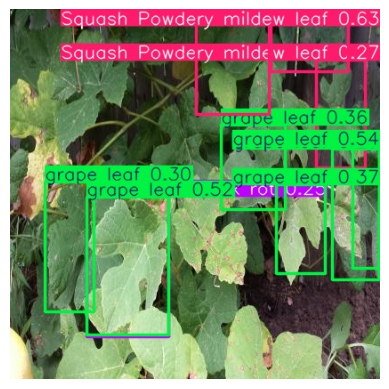

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Path to the predicted image (ensure this path is correct)
predicted_image_path = '/content/runs/detect/yolov8_plant_disease_detection33/00gb_jpg.rf.b042dab12dbd98469b5dd34e055da97c.jpg'
# Load the predicted image using OpenCV
predicted_image = cv2.imread(predicted_image_path)

# Convert BGR (OpenCV default format) to RGB for Matplotlib visualization
predicted_image_rgb = cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB)

# Display the predicted image using Matplotlib
plt.imshow(predicted_image_rgb)
plt.axis('off')  # Turn off the axes for a cleaner view
plt.show()


In [ ]:
# Function to extract and display recall values and mean recall
def display_recall_metrics(metrics):
    # Extract recall values and mean recall from the metrics
    recall_values = metrics.box.r
    mean_recall = metrics.box.mr

    # Display recall values for each class
    print("Recall values per class:")
    for i, recall in enumerate(recall_values):
        print(f"Class {i}: {recall:.4f}")

    # Display the overall mean recall
    print(f"\nOverall Mean Recall: {mean_recall:.4f}")

# Call the function to display the recall metrics
display_recall_metrics(metrics)



Recall values per class:
Class 0: 0.4074
Class 1: 0.6114
Class 2: 0.3504
Class 3: 0.0938
Class 4: 0.2063
Class 5: 0.6000
Class 6: 0.3191
Class 7: 0.3077
Class 8: 0.6889
Class 9: 0.6364
Class 10: 0.7719
Class 11: 0.3333
Class 12: 0.2986
Class 13: 0.8842
Class 14: 0.5294
Class 15: 0.5645
Class 16: 0.8931
Class 17: 0.0581
Class 18: 0.6154
Class 19: 0.5563
Class 20: 0.2653
Class 21: 0.1558
Class 22: 0.4186
Class 23: 0.3077
Class 24: 0.1132
Class 25: 0.0000
Class 26: 0.3333
Class 27: 0.6525

Overall Mean Recall: 0.4276


In [ ]:
# Extract precision values and mean precision
prec_values = metrics.box.p
mean_prec = metrics.box.mp

# Display the precision values with a simple loop for each class
print("Precision values per class:")
for i, prec in enumerate(prec_values):
    print(f"Class {i}: {prec:.4f}")

# Display the overall mean precision
print(f"\nOverall Mean Precision: {mean_prec:.4f}")


Precision values per class:
Class 0: 0.4866
Class 1: 0.4320
Class 2: 0.3483
Class 3: 0.2580
Class 4: 0.3205
Class 5: 0.4884
Class 6: 0.3603
Class 7: 0.1626
Class 8: 0.5701
Class 9: 0.6980
Class 10: 0.4120
Class 11: 0.2959
Class 12: 0.3783
Class 13: 0.5450
Class 14: 0.4151
Class 15: 0.6204
Class 16: 0.6453
Class 17: 0.2328
Class 18: 0.3577
Class 19: 0.2414
Class 20: 0.4436
Class 21: 0.2296
Class 22: 0.2980
Class 23: 0.1131
Class 24: 0.1894
Class 25: 0.0000
Class 26: 0.5214
Class 27: 0.5464

Overall Mean Precision: 0.3789


In [ ]:
# Extracting the individual metrics
map_75 = metrics.box.map75
map_50 = metrics.box.map50
map_50_95 = metrics.box.map

# Printing mAP values in a different format
print("Evaluation Metrics:")
print(f"  mAP at IoU=0.75: {map_75:.6f}")
print(f"  mAP at IoU=0.50: {map_50:.6f}")
print(f"  mAP at IoU 0.50-0.95: {map_50_95:.6f}")


Evaluation Metrics:
  mAP at IoU=0.75: 0.307837
  mAP at IoU=0.50: 0.381498
  mAP at IoU 0.50-0.95: 0.270930
